In [82]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [84]:
df =pd.read_csv('../Data/gurgaon_properties_cleaned_v2.csv')

In [86]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,Study room,Servant room,Store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,...,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,...,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.1,Carpet area: 595 (55.28 sq.m.),2,2,3,...,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,...,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.1,Super Built up area 1345(124.95 sq.m.),2,2,3,...,1345.0,NaN,NaN,1,0,0,0,0,0,0


In [88]:
df.shape

(3783, 23)

In [90]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     1
price_per_sqft            1
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                  845
agePossession             0
super_built_up_area    1869
built_up_area          2068
carpet_area            1842
Study room                0
Servant room              0
Store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='super_built_up_area', ylabel='built_up_area'>

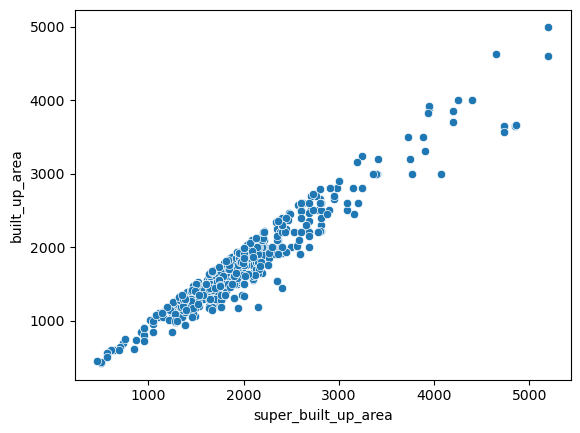

In [92]:
sns.scatterplot(x= df['super_built_up_area'],y =df['built_up_area'])

In [94]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'Study room', 'Servant room', 'Store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

<Axes: xlabel='carpet_area', ylabel='built_up_area'>

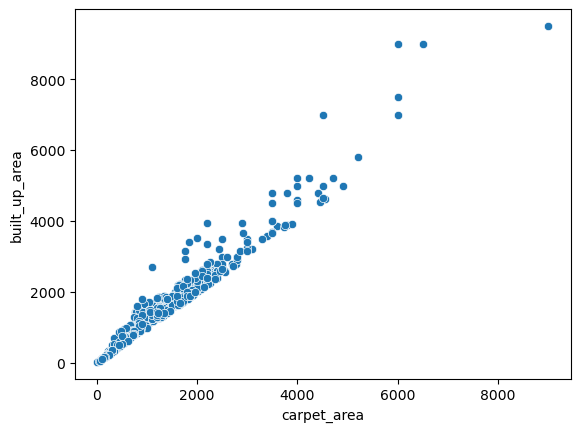

In [96]:
sns.scatterplot(x=df['carpet_area'],y=df['built_up_area'])

In [98]:
df[(df['super_built_up_area'].isnull()) &(df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,Study room,Servant room,Store room,pooja room,others,furnishing_type,luxury_score


- Observations
- No value having all 3 areas missing  

In [101]:
all_present_df =df[~(df['super_built_up_area'].isnull() | df['carpet_area'].isnull()|df['built_up_area'].isnull())]

In [103]:
all_present_df.shape

(534, 23)

In [105]:
sb_ratio =(all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
c_ratio =(all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [107]:
sb_ratio ,c_ratio

(1.1048701298701298, 0.900140056022409)

In [109]:
sbc_df =df[~(df['super_built_up_area'].isnull()) & ~ (df['carpet_area']).isnull() & (df['built_up_area']).isnull()]

In [111]:
sbc_df.shape

(428, 23)

In [113]:
sbc_df['built_up_area'].fillna(((sbc_df['super_built_up_area']*1.10 +sbc_df['carpet_area']*0.90)/2),inplace=True)

C:\Users\rajni\AppData\Local\Temp\ipykernel_6164\1442672198.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(((sbc_df['super_built_up_area']*1.10 +sbc_df['carpet_area']*0.90)/2),inplace=True)
C:\Users\rajni\AppData\Local\Temp\ipykernel_6164\1442672198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df[

In [115]:
df.update(sbc_df)

In [117]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     1
price_per_sqft            1
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                  845
agePossession             0
super_built_up_area    1869
built_up_area          1640
carpet_area            1842
Study room                0
Servant room              0
Store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [119]:
# Fetch the rows in which Sb is present but c & b is absent 
sb_present_df =df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [121]:
sb_present_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,Study room,Servant room,Store room,pooja room,others,furnishing_type,luxury_score
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.1,Super Built up area 1345(124.95 sq.m.),2,2,3,...,1345.0,NaN,NaN,1,0,0,0,0,0,0
6,flat,the cocoon,dwarka expressway,2.00,13333.0,1500.0,Super Built up area 1500(139.35 sq.m.),3,3,3,...,1500.0,NaN,NaN,0,0,0,0,0,0,0
13,flat,godrej,sector 33,0.95,6859.0,1385.0,Super Built up area 1385(128.67 sq.m.),2,2,3+,...,1385.0,NaN,NaN,0,0,0,0,0,0,0
14,flat,shree vardhman flora,sector 90,0.70,5384.0,1300.1,Super Built up area 1300(120.77 sq.m.),2,2,3,...,1300.0,NaN,NaN,1,0,0,0,0,0,15
19,flat,central park flower valley,sector 33,2.20,10476.0,2100.0,Super Built up area 2100(195.1 sq.m.),3,3,3,...,2100.0,NaN,NaN,0,1,0,0,0,2,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,flat,m3m woodshire,sector 107,1.40,5929.0,2361.3,Super Built up area 2361(219.34 sq.m.),3,4,0,...,2361.0,NaN,NaN,0,0,0,0,0,0,67
2933,flat,krishna appartment,sector 12,0.35,3500.0,1000.0,Super Built up area 1000(92.9 sq.m.),3,3,1,...,1000.0,NaN,NaN,0,0,0,0,0,0,0
2936,flat,ansal heights 86,sector 86,1.05,5541.0,1895.0,Super Built up area 1895(176.05 sq.m.),3,3,3,...,1895.0,NaN,NaN,0,1,0,0,0,0,0
2938,flat,raheja vedaanta,sector 108,0.95,5214.0,1822.0,Super Built up area 1822(169.27 sq.m.),3,3,3,...,1822.0,NaN,NaN,0,0,0,0,1,0,95


In [123]:
sb_present_df['built_up_area'].fillna((df['super_built_up_area']*1.10),inplace=True)

C:\Users\rajni\AppData\Local\Temp\ipykernel_6164\2180495341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_present_df['built_up_area'].fillna((df['super_built_up_area']*1.10),inplace=True)
C:\Users\rajni\AppData\Local\Temp\ipykernel_6164\2180495341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_present_df['built_up_area'].filln

In [125]:
df.update(sb_present_df)

In [127]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     1
price_per_sqft            1
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                  845
agePossession             0
super_built_up_area    1869
built_up_area           738
carpet_area            1842
Study room                0
Servant room              0
Store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [129]:
# Now we will do the same with the carpet_Area
c_present_df = df[~(df['carpet_area'].isnull()) & (df['built_up_area'].isnull()) & (df['super_built_up_area'].isnull())]

In [131]:
c_present_df.shape

(738, 23)

In [133]:
c_present_df['built_up_area'].fillna((c_present_df['carpet_area']*0.90),inplace =True)

C:\Users\rajni\AppData\Local\Temp\ipykernel_6164\4189955172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_present_df['built_up_area'].fillna((c_present_df['carpet_area']*0.90),inplace =True)
C:\Users\rajni\AppData\Local\Temp\ipykernel_6164\4189955172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_present_df['built_up_area'].fill

In [135]:
df.update(c_present_df)

In [137]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     1
price_per_sqft            1
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                  845
agePossession             0
super_built_up_area    1869
built_up_area             0
carpet_area            1842
Study room                0
Servant room              0
Store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

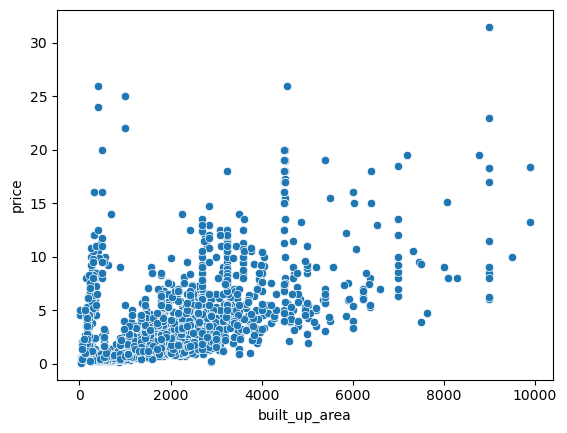

In [147]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [149]:
df = df[df['built_up_area'] <= 10000]


Observation 
  - We can see that for some value when area is less than even 2000 but it's price is in the crores that not justified
  - So we need to handle those areas so that our data remains clean

In [152]:
anamoly_df =df[(df['built_up_area']<2000) & (df['price']>5)][['price','area','built_up_area']]

In [154]:
anamoly_df.sample(5)

,price,area,built_up_area
3514,6.40,2700.0,366.0
3178,5.15,3660.0,340.0
3096,9.50,4071.0,500.0
3723,5.15,2727.0,302.0
3686,6.30,1800.0,1800.0


In [157]:

anamoly_df['built_up_area']=anamoly_df['area']

In [159]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

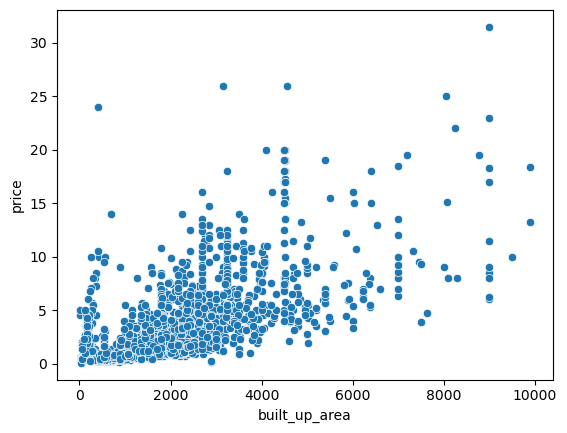

In [161]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [163]:
# df =df[df['built_up_area']<200000]

df = df[~((df['built_up_area'] < 2000) & (df['price'] > 5))]


In [165]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     1
price_per_sqft            1
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  842
agePossession             0
super_built_up_area    1798
built_up_area             0
carpet_area            1788
Study room                0
Servant room              0
Store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [167]:
df.drop(columns =['area','areaWithType','super_built_up_area','carpet_area'] ,inplace=True)

In [169]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing', 'agePossession',
       'built_up_area', 'Study room', 'Servant room', 'Store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [171]:
# Floor Num 


In [175]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,Study room,Servant room,Store room,pooja room,others,furnishing_type,luxury_score
172,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
2710,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
2962,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
2985,house,Independent,sector 2,5.60,17284.0,8,6,3,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0
3061,house,Independent,sector 24,1.45,26852.0,3,3,1,NaN,NotAvailable,Undefined,540.0,0,0,0,0,0,0,9
3098,house,Independent,sector 3,1.50,10288.0,3,3,0,NaN,NotAvailable,Undefined,210.0,0,0,0,0,0,0,0
3113,house,Independent,sector 4,4.12,8889.0,2,1,3,NaN,NotAvailable,Moderately Old,4635.0,0,0,0,0,0,0,0
3167,house,Independent,sector 4,0.65,11111.0,4,2,2,NaN,NotAvailable,Moderately Old,585.0,0,0,0,0,0,0,0
3183,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NotAvailable,Under Construction,1242.0,0,0,0,0,0,0,0
3317,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NotAvailable,Undefined,360.0,0,0,0,0,0,0,0


In [177]:
df[df['property_type']=='house']['floorNum'].median()

3.0

In [179]:
df['floorNum'].fillna(2.0,inplace=True)

In [181]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                1
price_per_sqft       1
bedRoom              0
bathroom             0
balcony              0
floorNum             0
facing             842
agePossession        0
built_up_area        0
Study room           0
Servant room         0
Store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

# Facing 

<Axes: ylabel='count'>

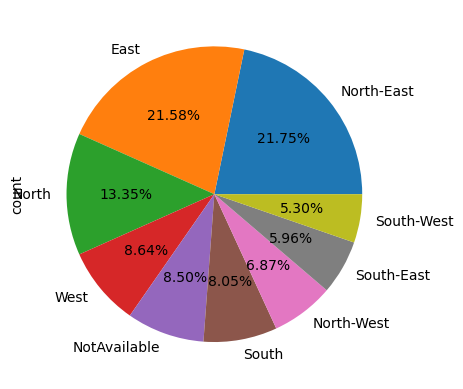

In [183]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [186]:
df.drop(columns=['facing'],inplace=True)

In [188]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              1
price_per_sqft     1
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
Study room         0
Servant room       0
Store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [190]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,Study room,Servant room,Store room,pooja room,others,furnishing_type,luxury_score
2710,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [192]:
df.drop(index=[2710],inplace=True)

In [194]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              1
price_per_sqft     1
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
Study room         0
Servant room       0
Store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [196]:
df[df['price'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,Study room,Servant room,Store room,pooja room,others,furnishing_type,luxury_score
18,flat,signature global orchard avenue 2,sector 93,NaN,NaN,2,2,3,11.0,Under Construction,519.444286,0,0,0,0,0,0,104


In [198]:
df.drop(index=[18],inplace =True)

In [200]:
df[df['price_per_sqft'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,Study room,Servant room,Store room,pooja room,others,furnishing_type,luxury_score


In [202]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
Study room         0
Servant room       0
Store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# Observations 
- All the missing value has been filled either using median or mean 
- Now we will explore the agePossession column bcz in that we have a value as undefined 

In [207]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
Undefined             1284
Moderately Old         554
Under Construction     129
New Property            96
Name: count, dtype: int64

Observations 
- We are having a lot of values as the undefined how we can handle this
- We know that there are sectors which are old as well as there are sector which are new so based on this we can fill these undefined values by looking at the sector as well as the property_type
- Bcz during our EDA we have explored that the old sectors are mostly having houses and new are having the flats so we will fill based on the property_type

# Observations 
- We still have a lot of missing value now we need to handle them also 

In [300]:
# Missing Value imputation using mode for the agePossession that are undefined 

def missing_value_imputation(row):
    if row['agePossession']=="Undefined":
        mode =df[(df['sector']==row['sector']) & (df['property_type']==row['property_type']) ]['agePossession'].mode()
        # if mode_value is empty (no mode found), return NaN,otherwise return the mode
        if not mode.empty:
            return mode.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']
            

In [302]:
# Filling Based on the Sector 
def missing_value_based_on_sector(row):
    if row['agePossession']=='Undefined':
        mode_value =df[(df['sector']==row['sector'])]['agePossession'].mode()
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [310]:
# Filling based on the Property_type
def missing_value_based_on_property_type(row):
    if row['agePossession']=='Undefined':
        mode_value =df[(df['property_type']==row['property_type'])]['agePossession'].mode()
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [312]:
df['agePossession']=df.apply(missing_value_imputation,axis=1)

In [305]:
df['agePossession'] =df.apply(missing_value_based_on_sector,axis =1)

In [314]:
df['agePossession'] =df.apply(missing_value_based_on_property_type,axis=1)

In [315]:
df['agePossession'].value_counts()

agePossession
Relatively New        2524
Moderately Old         942
Under Construction     132
New Property           111
Name: count, dtype: int64

In [318]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
Study room         0
Servant room       0
Store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [320]:
df.to_csv('gurgoan_properties_missing_value_imputation.csv',index=False)

In [322]:
df.shape

(3709, 18)